In [61]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import ipywidgets as widgets
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import math,pywt
import utilities as utils
import huffman_test
import pickle


from huffman import HuffmanCoding
from collections import Counter,OrderedDict
from ipywidgets import interact
from scipy import fftpack
from style import *
from camera import CameraReader, display_frame
from IPython.display import display
from PIL import Image
from tqdm import tqdm_notebook

def color2bw(img):
    return np.dot(img, [0.299, 0.587, 0.114])

PATH = "img_code.txt"  
h = HuffmanCoding(PATH)

In [76]:
size = 4
def eliminar_ruido(frame):
    #Mascara temporal
    S_img = fftpack.fftshift(fftpack.fft2(frame))
    S_img[220-size:220+size,421:423] = 0
    S_img[260-size:260+size,425:427] = 0
    r_frame = 1 + np.abs(fftpack.ifft2(fftpack.ifftshift(S_img)))
    #espectre=np.log(np.abs(S_img)+1).astype(np.uint8)
    return r_frame

In [77]:
def Cuantizacion(x,h=8):
    return (x//h)*h + (h//2)

In [82]:

def comprimir(frame):
    wave = Cuantizacion(utils.wavelet(utils.wavelet(frame))).astype(np.uint8)
    
    counts =Counter(np.ravel(wave)).most_common()
    dictt = huffman_test.huffman_coding(counts)

    code = huffman_test.encode(dictt,np.ravel(wave))
    
    pickle.dump(code, open("frame.papihuijse","wb"))

    return dictt

def descomprimir(dictt):
    
    decode = str(bin(pickle.load(open("frame.papihuijse","rb"))))
    
    array = huffman_test.decode(dictt,decode)
    
    return utils.dewavelet(utils.dewavelet(array))

In [83]:
cam = CameraReader()
vid_height, vid_width = cam.get_resolution()
print("Resolución del video: {0}x{1}p".format(vid_width, vid_height))
print("Cuadros por segundo: {0}".format(cam.get_fps()))

out = widgets.Image(layout=widgets.Layout(width=str(vid_width), 
                                          height=str(vid_height)))

def replay():
    frame_cnt = 0
    
    for frame in cam:
        # Implemente una función que limpie los frames
        #if frame_cnt%2 !=0:
        #scipy.misc.imsave("filtered{0}.jpg".format(frame_cnt),frame)
        frame_limpio = eliminar_ruido(frame)
        #print(sys.getsizeof(frame_limpio))  #getsizeof retorna el tamaño en Bytes

        # Implemente una función que comprima los frames
        diccionario = comprimir(frame_limpio)
        #print(sys.getsizeof(frame_comprimido))

        #Implemente una función que descomprima los frames
        frame = descomprimir(diccionario)
        #print(cam.error(frame_limpio))  # Error de compresión
        display_frame(out, frame)
        
        frame_cnt+=1
        if frame_cnt==1:
            break
    

button = widgets.Button(
    description='Replay Video',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Replay',
    icon='check'
)

def on_click_button(b):
    
    replay()
    

button.on_click(on_click_button)

display(button,out)


Iniciando lector de camara
OpenCV version: major: 4, minor: 1, subminor: 0
Resolución del video: 848x480p
Cuadros por segundo: 29.97002997002997


Button(description='Replay Video', icon='check', style=ButtonStyle(), tooltip='Replay')

Image(value=b'', layout="Layout(height='480', width='848')")

0011110100 499314
499314 0b11110100


<IPython.core.display.Javascript object>


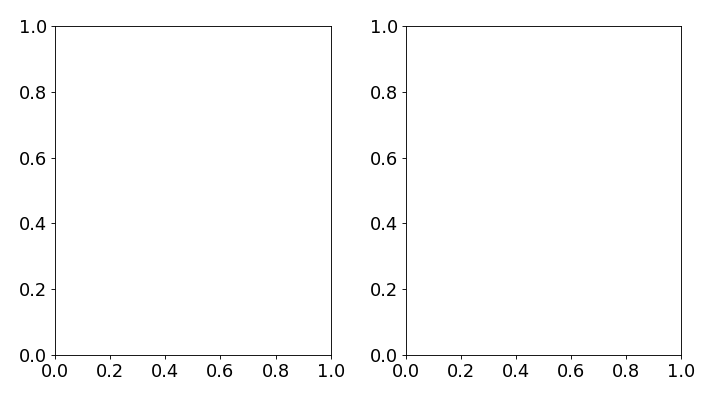

interactive(children=(IntSlider(value=10, description='size', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.update(size)>

In [57]:
size = 1
fig, ax = plt.subplots(1, 2, figsize=(9, 5), tight_layout=True)
def update(size):
        img_building = np.array(plt.imread("outfile.jpg".format(i)))
        S_img = fftpack.fftshift(fftpack.fft2(img_building))

        S_img[220-size:220+size,421:423] = 0
        S_img[260-size:260+size,425:427] = 0
        #S_img[380-size:380+size,425:427] = 0
        #S_img[440-size:440+size,425:427] = 0
        im = ax[0].imshow(np.log(1+np.abs(S_img)))
        #fig.colorbar(im, ax=ax[0], orientation='horizontal')
        im = ax[1].imshow(np.abs(fftpack.ifft2(fftpack.ifftshift(S_img))))
        #fig.colorbar(im, ax=ax[1], orientation='horizontal')
        

interact(update,size=widgets.IntSlider(min=1, max=20, value=10))

In [8]:
noise_p1 = 220,422
noise_p2 = 260,426
noise_p3 = 380,426
noise_p4 = 440,26


<IPython.core.display.Javascript object>


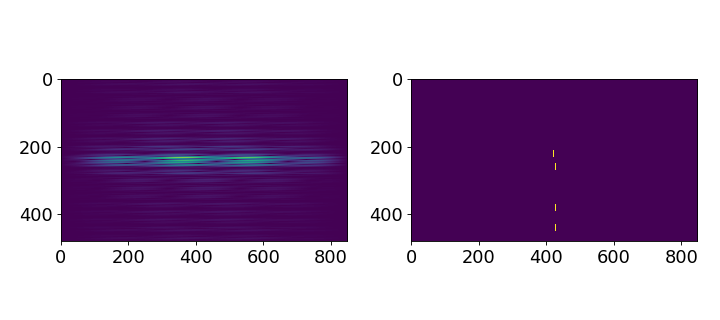

interactive(children=(IntSlider(value=10, description='size', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.update(size)>

In [7]:
#Testing ground

size = 1
img_building = np.array(plt.imread("outfile.jpg"))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), tight_layout=True)



#x[380-size:380+size,425:427] = 1
#x[440-size:440+size,425:427] = 1

def update(size):
    x = np.zeros(shape=(480,848)).astype(np.uint8)
    x[220-size:220+size,421:423] = 255
    x[260-size:260+size,425:427] = 255
    x[380-size:380+size,425:427] = 255
    x[440-size:440+size,425:427] = 255
    S_img = fftpack.ifftshift(fftpack.ifft2(x))

    im = ax[0].imshow(np.log(1+np.abs(S_img)))
    #fig.colorbar(im, ax=ax[0], orientation='horizontal')
    im = ax[1].imshow(np.abs(fftpack.fft2(fftpack.fftshift(S_img))))
    #fig.colorbar(im, ax=ax[1], orientation='horizontal')
    #scipy.misc.imsave("filtered.jpg",np.abs(fftpack.ifft2(fftpack.ifftshift(S_img))))

interact(update,size=widgets.IntSlider(min=1, max=20, value=10))

In [11]:
def Q(x,h=8):
    return (x//h)*8+(h/2)

In [8]:
##########################
##Muestra las imagenes del espectro en secuencia
##########################
out = widgets.Image(layout=widgets.Layout(width=str(848), 
                                          height=str(480)))

display(out)

for i in tqdm_notebook(range(900)):
    img_building = Image.open("spectres/filtered{0}.jpg".format(i))
    display_frame(out,np.array(img_building).astype(np.uint8))

Image(value=b'', layout="Layout(height='480', width='848')")

In [ ]:
data = np.array(Image.open("filtered.jpg")).astype(np.uint8)
out = widgets.Image(layout=widgets.Layout(width=str(848), 
                                          height=str(480)))

#display(out)
#display_frame(out,data.astype(np.uint8))

with open("final.txt","rb") as f:
    a = np.load(f)
alto = a.shape[0]
ancho = a.shape[1]
#LL = a[:alto//2,:ancho//2]
#LH = a[:alto//2,ancho//2:ancho]
#HL = a[alto//2:alto,:ancho//2]
#HH = a[alto//2:alto,ancho//2:ancho]
#print("data: ",sys.getsizeof(data))
#LL, (LH, HL, HH) = pywt.dwt2(data, wavelet='db1')

##cuantizar 
#llq,hlq,lhq,hhq = Q(LL),Q(HL),Q(LH),Q(HH)
#a = Cuantizacion(a)
#np.savetxt('mio.txt',a,fmt='%1.1f')

path = "frame.txt"

h = HuffmanCoding(path)

output_path = h.compress()
print("Compressed file path: " + output_path)

decom_path = h.decompress(output_path)
print("Decompressed file path: " + decom_path)


with open("frame_decompressed.txt","r") as file:
    real = eval(file.read())
    

alto = real.shape[0]
ancho = real.shape[1]
LL = real[:alto//2,:ancho//2]
LH = real[:alto//2,ancho//2:ancho]
HL = real[alto//2:alto,:ancho//2]
HH = real[alto//2:alto,ancho//2:ancho]
real = utils.inversa(LL,HL,LH,HH)
out = widgets.Image(layout=widgets.Layout(width=str(848), 
                                          height=str(480)))

display(out)
display_frame(out,real.astype(np.uint8))


[-3.68996727e-074 -4.94743724e+080 -1.99385441e+081 ...  2.58656327e-231
  2.58656327e-231  2.58656327e-231]


NameError: name 'dictt' is not defined